In [1]:

import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud

In [2]:
import pandas as pd
import numpy as np
import re

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [1]:
import nltk
nltk.download("popular")

In [6]:
df=pd.read_excel('Group3-news-text-sanitized (1).xlsx')

In [7]:
df = df.drop_duplicates('Tweet',keep='first')
df['Tweet'].count()

10138

In [8]:
df["Cleaned_Tweet"] = [re.sub(r"(@[A-Za-z0–9_]+)|[^\w\s]|#|http\S+", "", v.lower()) for v in df["Tweet"]] #cleaning then data
df

,Category,Confidence,Tweet,Cleaned_Tweet
0,Not Relevant,1.0000,Hey! How are you?,hey how are you
1,Not Relevant,1.0000,What's up man?,whats up man
2,Not Relevant,1.0000,I love fruits,i love fruits
3,Not Relevant,1.0000,Summer is lovely,summer is lovely
4,Not Relevant,1.0000,My car is so fast,my car is so fast
...,...,...,...,...
10318,Relevant,0.3994,Make man pikin crash ??????,make man pikin crash
10319,Relevant,0.3994,Disregard my snap story there is an angry whit...,disregard my snap story there is an angry whit...
10320,Relevant,0.3982,#tornado #singapore Mac and #cheese #around th...,tornado singapore mac and cheese around the wo...
10321,Not Relevant,0.3367,Check out more data on Upper Wabash reservoirs...,check out more data on upper wabash reservoirs...


In [ ]:

def data_preprocessing(data):
    Cleaned_tweets = re.sub(r'https?://\S+|www\.\S+|#\w+|\@\w+|\d+|[^\w\s]', '', data.lower())
    words=word_tokenize(Cleaned_tweets)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    preprocessed_text = ' '.join(words)
    return preprocessed_text

In [9]:
df.drop('Tweet',axis=1) 

,Category,Confidence,Cleaned_Tweet
0,Not Relevant,1.0000,hey how are you
1,Not Relevant,1.0000,whats up man
2,Not Relevant,1.0000,i love fruits
3,Not Relevant,1.0000,summer is lovely
4,Not Relevant,1.0000,my car is so fast
...,...,...,...
10318,Relevant,0.3994,make man pikin crash
10319,Relevant,0.3994,disregard my snap story there is an angry whit...
10320,Relevant,0.3982,tornado singapore mac and cheese around the wo...
10321,Not Relevant,0.3367,check out more data on upper wabash reservoirs...


In [10]:
vals_to_replace = {'Relevant':1, 'Not Relevant':0}
df['Category'] = df['Category'].map(vals_to_replace)

In [11]:
df.dropna(inplace=True) 

In [12]:
df['Category'].unique()

array([0., 1.])

In [13]:

X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_Tweet'], df['Category'], test_size=0.2, random_state=42)

In [14]:
tokenizer = Tokenizer() 
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train) 
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [15]:
max_sequence_length = 100
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

In [16]:
from keras.layers import Dense, Activation, Flatten,Dropout

In [17]:
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 32, input_length=max_sequence_length)) 
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=5, batch_size=32)  

Epoch 1/5
254/254 [==============================] - 41s 135ms/step - loss: 0.5279 - accuracy: 0.7308 - val_loss: 0.4381 - val_accuracy: 0.8044
Epoch 2/5
254/254 [==============================] - 32s 125ms/step - loss: 0.3172 - accuracy: 0.8713 - val_loss: 0.4714 - val_accuracy: 0.7867
Epoch 3/5
254/254 [==============================] - 34s 134ms/step - loss: 0.1997 - accuracy: 0.9278 - val_loss: 0.5276 - val_accuracy: 0.7906
Epoch 4/5
254/254 [==============================] - 33s 130ms/step - loss: 0.1376 - accuracy: 0.9512 - val_loss: 0.6209 - val_accuracy: 0.7872
Epoch 5/5
254/254 [==============================] - 32s 125ms/step - loss: 0.1049 - accuracy: 0.9649 - val_loss: 0.6452 - val_accuracy: 0.7842


In [19]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

In [20]:
y_pred = model.predict(X_test_padded)
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

64/64 [==============================] - 3s 33ms/step
AUC: 0.8447669362466136


In [21]:
import matplotlib.pyplot as plt 

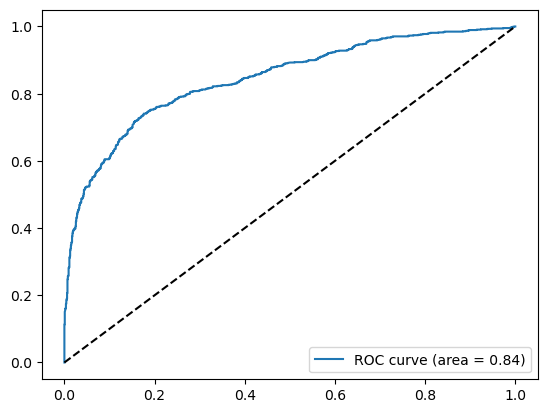

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.legend(loc="lower right")
plt.show() 

In [23]:
model.save('dnn_model.h5')

In [24]:
from keras.models import load_model

In [25]:

relevant_tweets = df.query("Category==1")["Cleaned_Tweet"].apply(str).str.cat(sep=' ')
not_relevant_tweets = df.query("Category==0")["Cleaned_Tweet"].apply(str).str.cat(sep=' ')

In [26]:

relevant_wordcloud = WordCloud().generate(relevant_tweets)


In [27]:

not_relevant_wordcloud = WordCloud().generate(not_relevant_tweets)

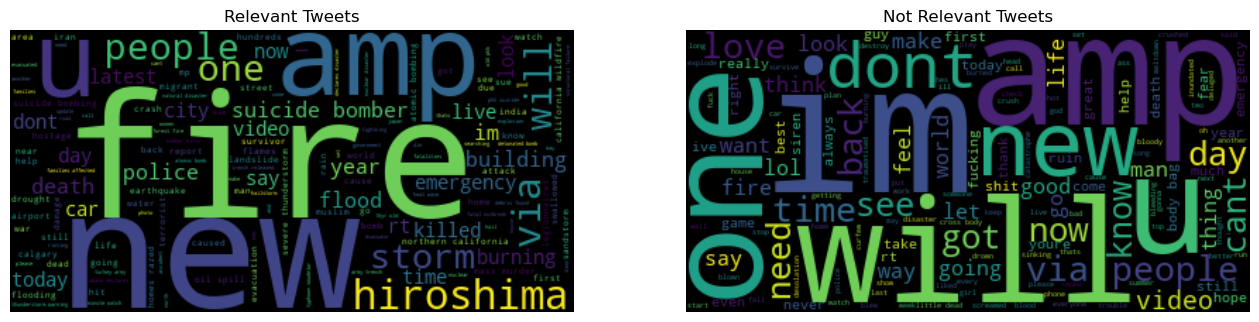

In [28]:
# Plot the word clouds
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(relevant_wordcloud, interpolation="bilinear")
plt.title("Relevant Tweets")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(not_relevant_wordcloud, interpolation="bilinear")
plt.title("Not Relevant Tweets")
plt.axis("off")
plt.show()